## **Import Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5, 2)
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.unicode_minus'] = False

### **Load dataset**

In [31]:
N_train = 900

In [32]:
# Define filename for save
fn_sv = f'N_train{N_train}'

import pickle

# Load pickle of settings
with open(fn_sv + '_option.pkl', 'rb') as fw:
    data = pickle.load(fw)
# Define variable from dictionary
for var in data.keys():
    exec("{} = data['{}']".format(var, var))
'''
    N_train, df_train_type_ratio, data_type, dict_map_type
'''

# Load pickle of trainset
with open(fn_sv + '_train.pkl', 'rb') as fw:
    data = pickle.load(fw)
# Define variable from dictionary
for var in data.keys():
    exec("{} = data['{}']".format(var, var))
'''
    df_train_set_list, df_train_labels_list
'''

# Load pickle of validset
with open(fn_sv + '_valid.pkl', 'rb') as fw:
    data = pickle.load(fw)
# Define variable from dictionary
for var in data.keys():
    exec("{} = data['{}']".format(var, var))
'''
    df_valid_set_list, df_valid_labels_list
'''

# Load pickle of validset
with open(fn_sv + '_test.pkl', 'rb') as fw:
    data = pickle.load(fw)
# Define variable from dictionary
for var in data.keys():
    exec("{} = data['{}']".format(var, var))
'''
    df_test_set, df_test_labels
'''

'\n    df_test_set, df_test_labels\n'

In [33]:
print('%%%%%%%%%%' + '  Train   ' + '%%%%%%%%%%%%%%')
print(f"N_data: {df_train_type_ratio.sum(axis = 0)['N_data']}")
print(f"Total count: {df_train_type_ratio.sum(axis = 0)['Total count']}")
print(f"Ratio: {df_train_type_ratio.sum(axis = 0)['N_data']/df_train_type_ratio.sum(axis = 0)['Total count']*100}")

print('%%%%%%%%%%' + '  Validation   ' + '%%%%%%%%%%%%%%')
print(f"N_data: {df_train_type_ratio.sum(axis = 0)['Total count'] - df_train_type_ratio.sum(axis = 0)['N_data']}")
print(f"Total count: {df_train_type_ratio.sum(axis = 0)['Total count']}")
print(f"Ratio: {100 - df_train_type_ratio.sum(axis = 0)['N_data']/df_train_type_ratio.sum(axis = 0)['Total count']*100}")

print('%%%%%%%%%%' + '  Test   ' + '%%%%%%%%%%%%%%')
print(f"N_data: {df_test_set.shape[0]}")

%%%%%%%%%%  Train   %%%%%%%%%%%%%%
N_data: 900.0
Total count: 1202.0
Ratio: 74.87520798668885
%%%%%%%%%%  Validation   %%%%%%%%%%%%%%
N_data: 302.0
Total count: 1202.0
Ratio: 25.12479201331115
%%%%%%%%%%  Test   %%%%%%%%%%%%%%
N_data: 1597


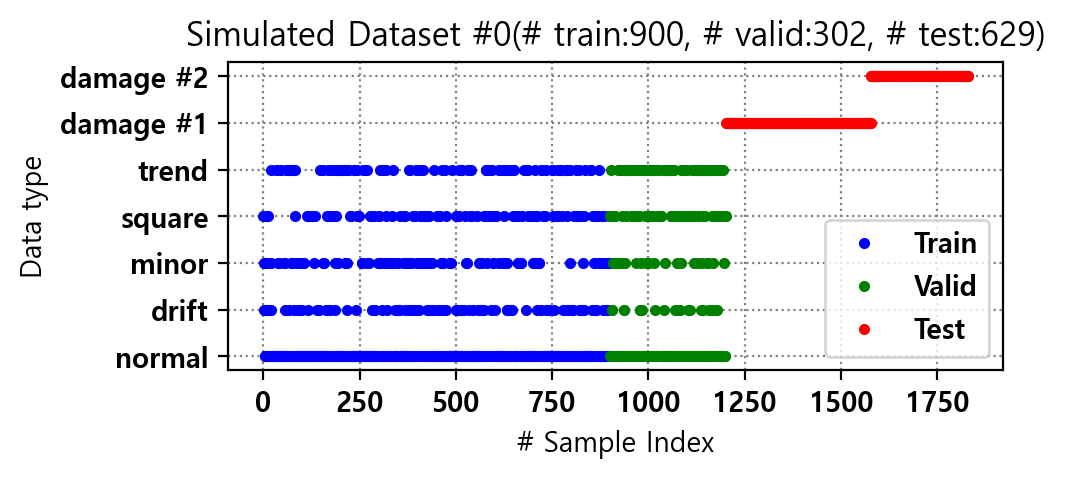

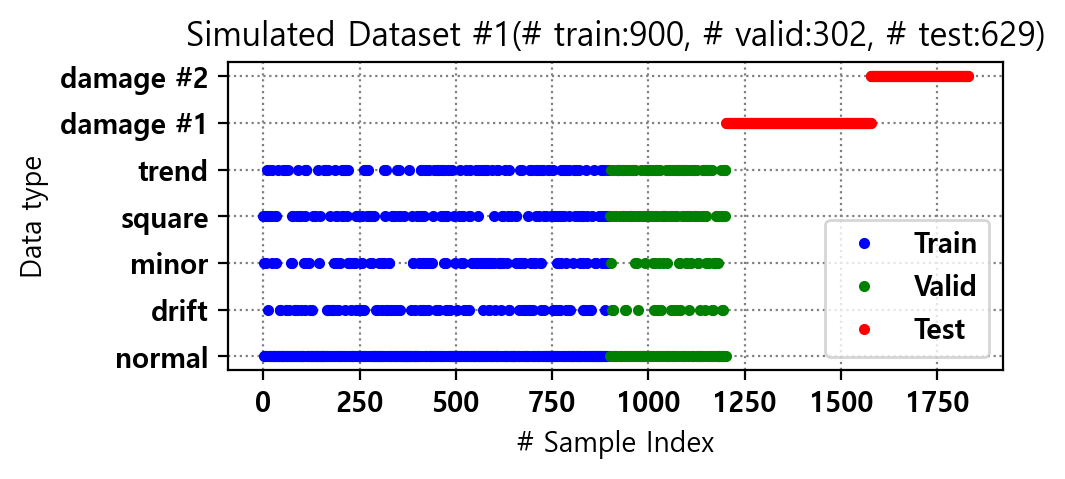

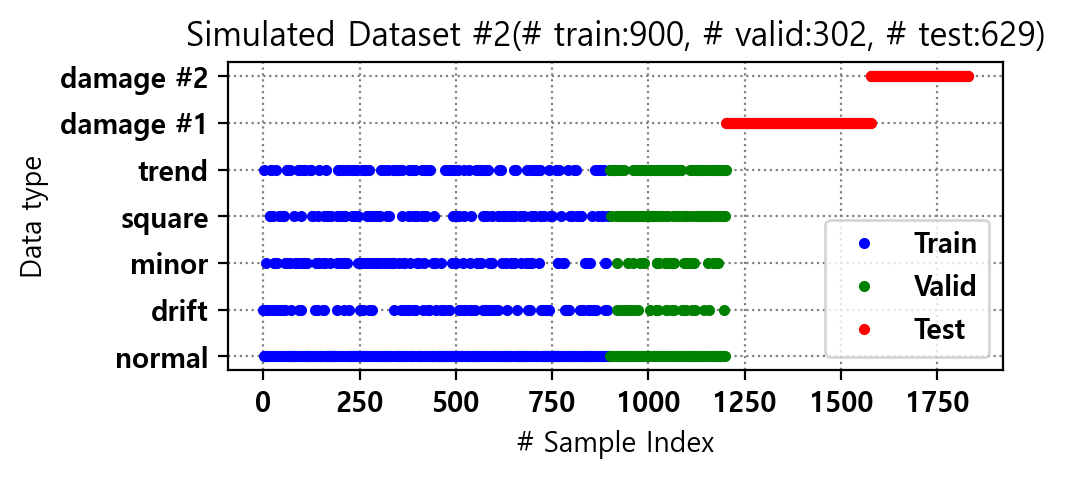

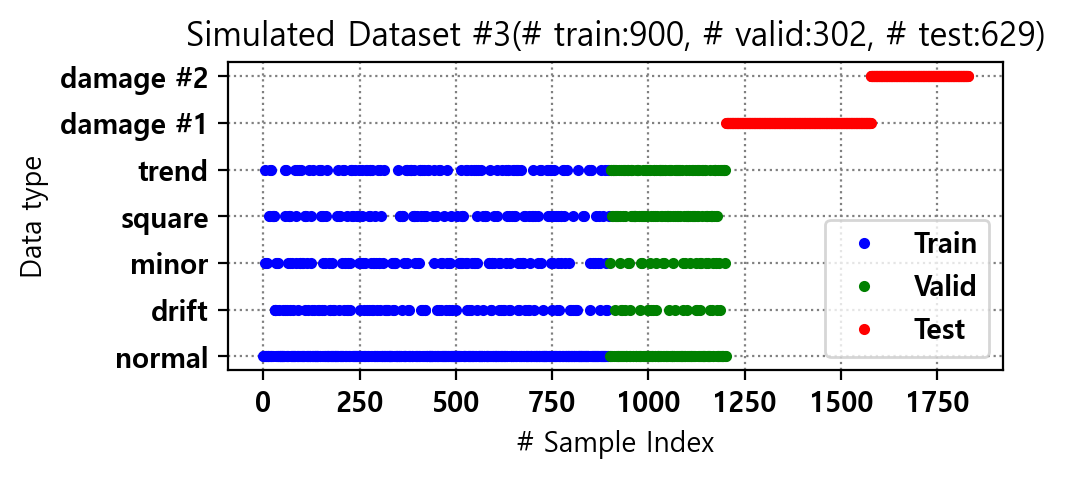

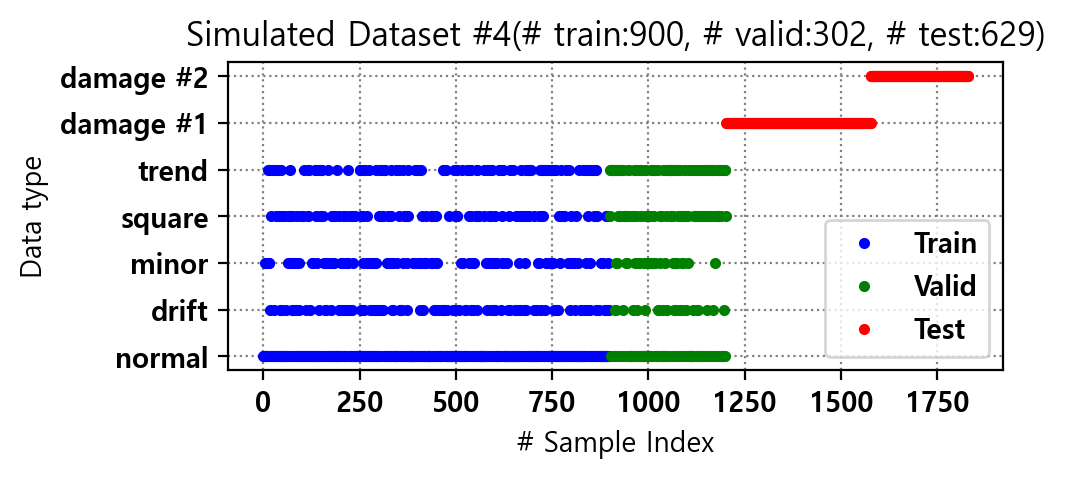

In [35]:
testset = df_test_labels

for i in range(len(df_train_labels_list)):
    trainset = df_train_labels_list[i]
    vaildset = df_valid_labels_list[i]

    n1 = trainset.shape[0]
    n2 = trainset.shape[0] + vaildset.shape[0]
    n3 = trainset.shape[0] + vaildset.shape[0] + testset.shape[0]

    plt.plot(np.arange(n1), trainset.to_numpy(), linestyle = 'None', marker = '.', color = 'b', label = 'Train')
    plt.plot(np.arange(n1, n2), vaildset.to_numpy(), linestyle = 'None', marker = '.', color = 'g', label = 'Valid')
    plt.plot(np.arange(n2, n3), testset.to_numpy(), linestyle = 'None', marker = '.', color = 'r', label = 'Test')
    plt.xlabel('# Sample Index')
    plt.ylabel('Data type')
    plt.grid(ls = ':', color = 'gray')
    plt.gca().set_yticks(range(7))
    plt.gca().set_yticklabels(data_type[0:-2] + ['damage #1', 'damage #2'])
    plt.title(f'Simulated Dataset #{i}(# train:{trainset.shape[0]}, # valid:{vaildset.shape[0]}, # test:{testset.shape[0]})')
    plt.legend()
    plt.show()